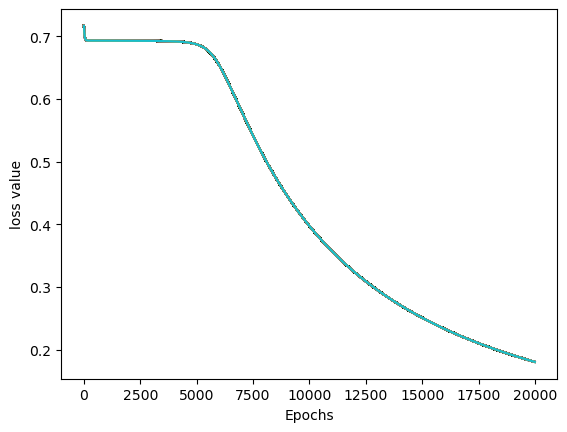

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]])
no_x = 2
no_y = 1
no_h = 2
tot = x.shape[1]
lr = 0.1
np.random.seed(2)
w1 = np.random.rand(no_h, no_x)
w2 = np.random.rand(no_y, no_h)
losses = []

def sigmoid(z):
    z = 1/(1+np.exp(-z))
    return z

def frwd_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

def back_prop(tot,w1,w2,z1,a1,z2,a2,y):
   
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/tot
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/tot
    dw1 = np.reshape(dw1,w1.shape)
   
    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1

epochs = 20000
for i in range(epochs):
    z1,a1,z2,a2 = frwd_prop(w1,w2,x)
    loss  =-(1/tot)*np.sum(y*np.log(a2) + (1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(tot,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1
   
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("loss value")